### Context

    In hospitals, medical treatments and surgeries can be categorized into inpatient and outpatient procedures. For patients, it is important to understand the difference between these two types of care, because they impact the length of a patient’s stay in a medical facility and the cost of a procedure. 
    
### Inpatient Care (Incare Patient) and Outpatient Care (Outcare Patient)

    The difference between an inpatient and outpatient care is how long a patient must remain in the facility where they have the procedure done.

    Inpatient care requires overnight hospitalization. Patients must stay at the medical facility where their procedure was done (which is usually a hospital) for at least one night. During this time, they remain under the supervision of a nurse or doctor.

    Patients receiving outpatient care do not need to spend a night in a hospital. They are free to leave the hospital once the procedure is over. In some exceptional cases, they need to wait while anesthesia wears off or to make sure there are not any complications. As long as there are not any serious complications, patients do not have to spend the night being supervised. [source of information: pbmhealth]

### Problem Statement

    In today’s world of automation, the skills and knowledge of a person could be utilized at the best places possible by automating tasks wherever possible. As a part of the hospital automation system, one can build a system that would predict and estimate whether the patient should be categorized as an incare patient or an outcare patient with the help of several data points about the patients, their conditions and lab tests.


### Objective

    Build a machine learning model to predict if the patient should be classified as in care or out care based on the patient's laboratory test result.
    
### Evaluation Criteria - F1 score.

# Load Libraries

In [100]:

import pandas as pd # for data manipulation 
import numpy as np # for numerical work

# for Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# If any warning arrives to ignore it
import warnings
warnings.filterwarnings('ignore')

# for Preprocessing, Modeling & Evalution
from sklearn.model_selection import train_test_split # for train - test data split
from sklearn.linear_model import LogisticRegression # for Linear Regression Model
from sklearn.ensemble import RandomForestClassifier # for Random Forest Regression
from sklearn.tree import DecisionTreeClassifier # for Decision Tree Regression
from sklearn.model_selection import GridSearchCV # for Grid Search CV

from sklearn.metrics import confusion_matrix # confusion matrix
from sklearn.metrics import classification_report # Classification Report
from sklearn.metrics import f1_score # for F1 Score
from sklearn.metrics import accuracy_score # to check accuracy score for model

## Loading Data - Train & Test 

In [2]:
# Loading Train dataset

patient_data  = pd.read_csv(
    "https://raw.githubusercontent.com/dphi-official/Datasets/master/patient_treat_class/training_set_label.csv" )
train = patient_data.copy()
train

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,33.8,11.1,4.18,4.6,150,26.6,32.8,80.9,33,F,1
1,44.6,14.0,6.86,6.3,232,20.4,31.4,65.0,36,M,0
2,42.9,14.0,4.57,6.2,336,30.6,32.6,93.9,70,F,0
3,41.9,14.4,4.67,3.5,276,30.8,34.4,89.7,18,F,0
4,40.6,13.3,4.85,14.9,711,27.4,32.8,83.7,36,M,0
...,...,...,...,...,...,...,...,...,...,...,...
3304,39.0,13.2,4.45,4.0,50,29.7,33.8,87.6,45,M,1
3305,25.4,8.2,3.27,5.4,90,25.1,32.3,77.7,1,F,1
3306,38.2,12.4,4.40,8.4,328,28.2,32.5,86.8,64,M,0
3307,43.4,15.2,5.29,10.1,326,28.7,35.0,82.0,33,M,0


In [3]:
# Loading test dataset

test_data = pd.read_csv(
    'https://raw.githubusercontent.com/dphi-official/Datasets/master/patient_treat_class/testing_set_label.csv')
test = test_data.copy()
test

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX
0,41.2,14.3,3.99,4.1,296,35.8,34.7,103.3,24,M
1,25.4,9.1,3.17,19.3,304,28.7,35.8,80.1,66,M
2,47.5,15.2,6.23,11.5,385,24.4,32.0,76.2,17,F
3,43.0,14.5,5.35,4.8,134,27.1,33.7,80.4,14,M
4,40.7,13.6,4.77,4.3,199,28.5,33.4,85.3,24,M
...,...,...,...,...,...,...,...,...,...,...
1098,32.0,10.2,3.60,12.9,270,28.3,31.9,88.9,73,M
1099,42.0,13.5,5.00,5.0,297,27.0,32.1,84.0,38,F
1100,39.3,13.3,4.49,3.3,50,29.6,33.8,87.5,47,F
1101,38.9,12.9,4.32,3.2,154,29.9,33.2,90.0,46,F


## Exploratry Data Analysis

In [4]:
train.shape, test.shape

((3309, 11), (1103, 10))

In [5]:
train.head(15)

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,33.8,11.1,4.18,4.6,150,26.6,32.8,80.9,33,F,1
1,44.6,14.0,6.86,6.3,232,20.4,31.4,65.0,36,M,0
2,42.9,14.0,4.57,6.2,336,30.6,32.6,93.9,70,F,0
3,41.9,14.4,4.67,3.5,276,30.8,34.4,89.7,18,F,0
4,40.6,13.3,4.85,14.9,711,27.4,32.8,83.7,36,M,0
5,32.8,11.2,3.94,11.0,324,28.4,34.1,83.2,89,F,0
6,21.9,7.3,3.06,22.6,237,23.9,33.3,71.6,53,M,0
7,38.4,12.3,4.37,9.0,193,28.1,32.0,87.9,74,M,1
8,27.9,9.2,3.13,19.2,135,29.4,33.0,89.1,56,M,1
9,38.2,12.9,4.53,11.7,452,28.5,33.8,84.3,66,M,1


In [6]:
train.tail(15)

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
3294,32.2,10.5,3.82,19.1,152,27.5,32.6,84.3,69,M,1
3295,44.0,15.8,5.28,6.7,257,29.9,35.9,83.3,39,M,0
3296,39.4,12.9,4.40,4.8,372,29.3,32.7,89.5,45,F,0
3297,44.7,15.5,5.06,5.7,256,30.6,34.7,88.3,40,M,0
3298,37.2,11.7,6.18,16.6,336,18.9,31.5,60.2,33,F,0
3299,33.7,11.6,4.16,5.2,205,27.9,34.4,81.0,4,M,0
3300,34.7,11.8,4.07,7.4,280,29.0,34.0,85.3,42,F,1
3301,43.7,13.8,5.02,6.2,297,27.5,31.6,87.1,52,F,1
3302,43.1,14.3,5.24,5.5,55,27.3,33.2,82.3,22,M,1
3303,34.3,11.2,4.41,11.0,103,25.4,32.7,77.8,8,F,0


In [7]:
print("Train Data -")
print(train.info(), "\n")
print("Test Data -")
print(test.info(), "\n")

Train Data -
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3309 entries, 0 to 3308
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HAEMATOCRIT   3309 non-null   float64
 1   HAEMOGLOBINS  3309 non-null   float64
 2   ERYTHROCYTE   3309 non-null   float64
 3   LEUCOCYTE     3309 non-null   float64
 4   THROMBOCYTE   3309 non-null   int64  
 5   MCH           3309 non-null   float64
 6   MCHC          3309 non-null   float64
 7   MCV           3309 non-null   float64
 8   AGE           3309 non-null   int64  
 9   SEX           3309 non-null   object 
 10  SOURCE        3309 non-null   int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 284.5+ KB
None 

Test Data -
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HAEMATOCRIT   1103 non-null   float64
 1

In [8]:
train.describe()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SOURCE
count,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000
mean,38.226111,12.749350,4.544802,8.715533,258.893019,28.230039,33.336476,84.611333,46.644303,0.398005
std,5.971943,2.084325,0.784510,4.991299,112.676139,2.696520,1.247055,6.916079,21.874106,0.489561
min,13.700000,3.800000,1.480000,1.100000,10.000000,14.900000,26.000000,54.000000,1.000000,0.000000
25%,34.300000,11.400000,4.040000,5.700000,191.000000,27.200000,32.700000,81.500000,29.000000,0.000000
50%,38.700000,12.900000,4.580000,7.600000,257.000000,28.700000,33.400000,85.300000,48.000000,0.000000
75%,42.500000,14.200000,5.060000,10.300000,322.000000,29.800000,34.100000,88.800000,64.000000,1.000000
max,69.000000,18.900000,7.860000,76.600000,1121.000000,40.800000,38.400000,115.600000,99.000000,1.000000


In [9]:
train.skew()

HAEMATOCRIT    -0.307494
HAEMOGLOBINS   -0.334413
ERYTHROCYTE    -0.007189
LEUCOCYTE       2.877579
THROMBOCYTE     0.829048
MCH            -1.222285
MCHC           -0.566437
MCV            -0.812253
AGE            -0.131317
SOURCE          0.416930
dtype: float64

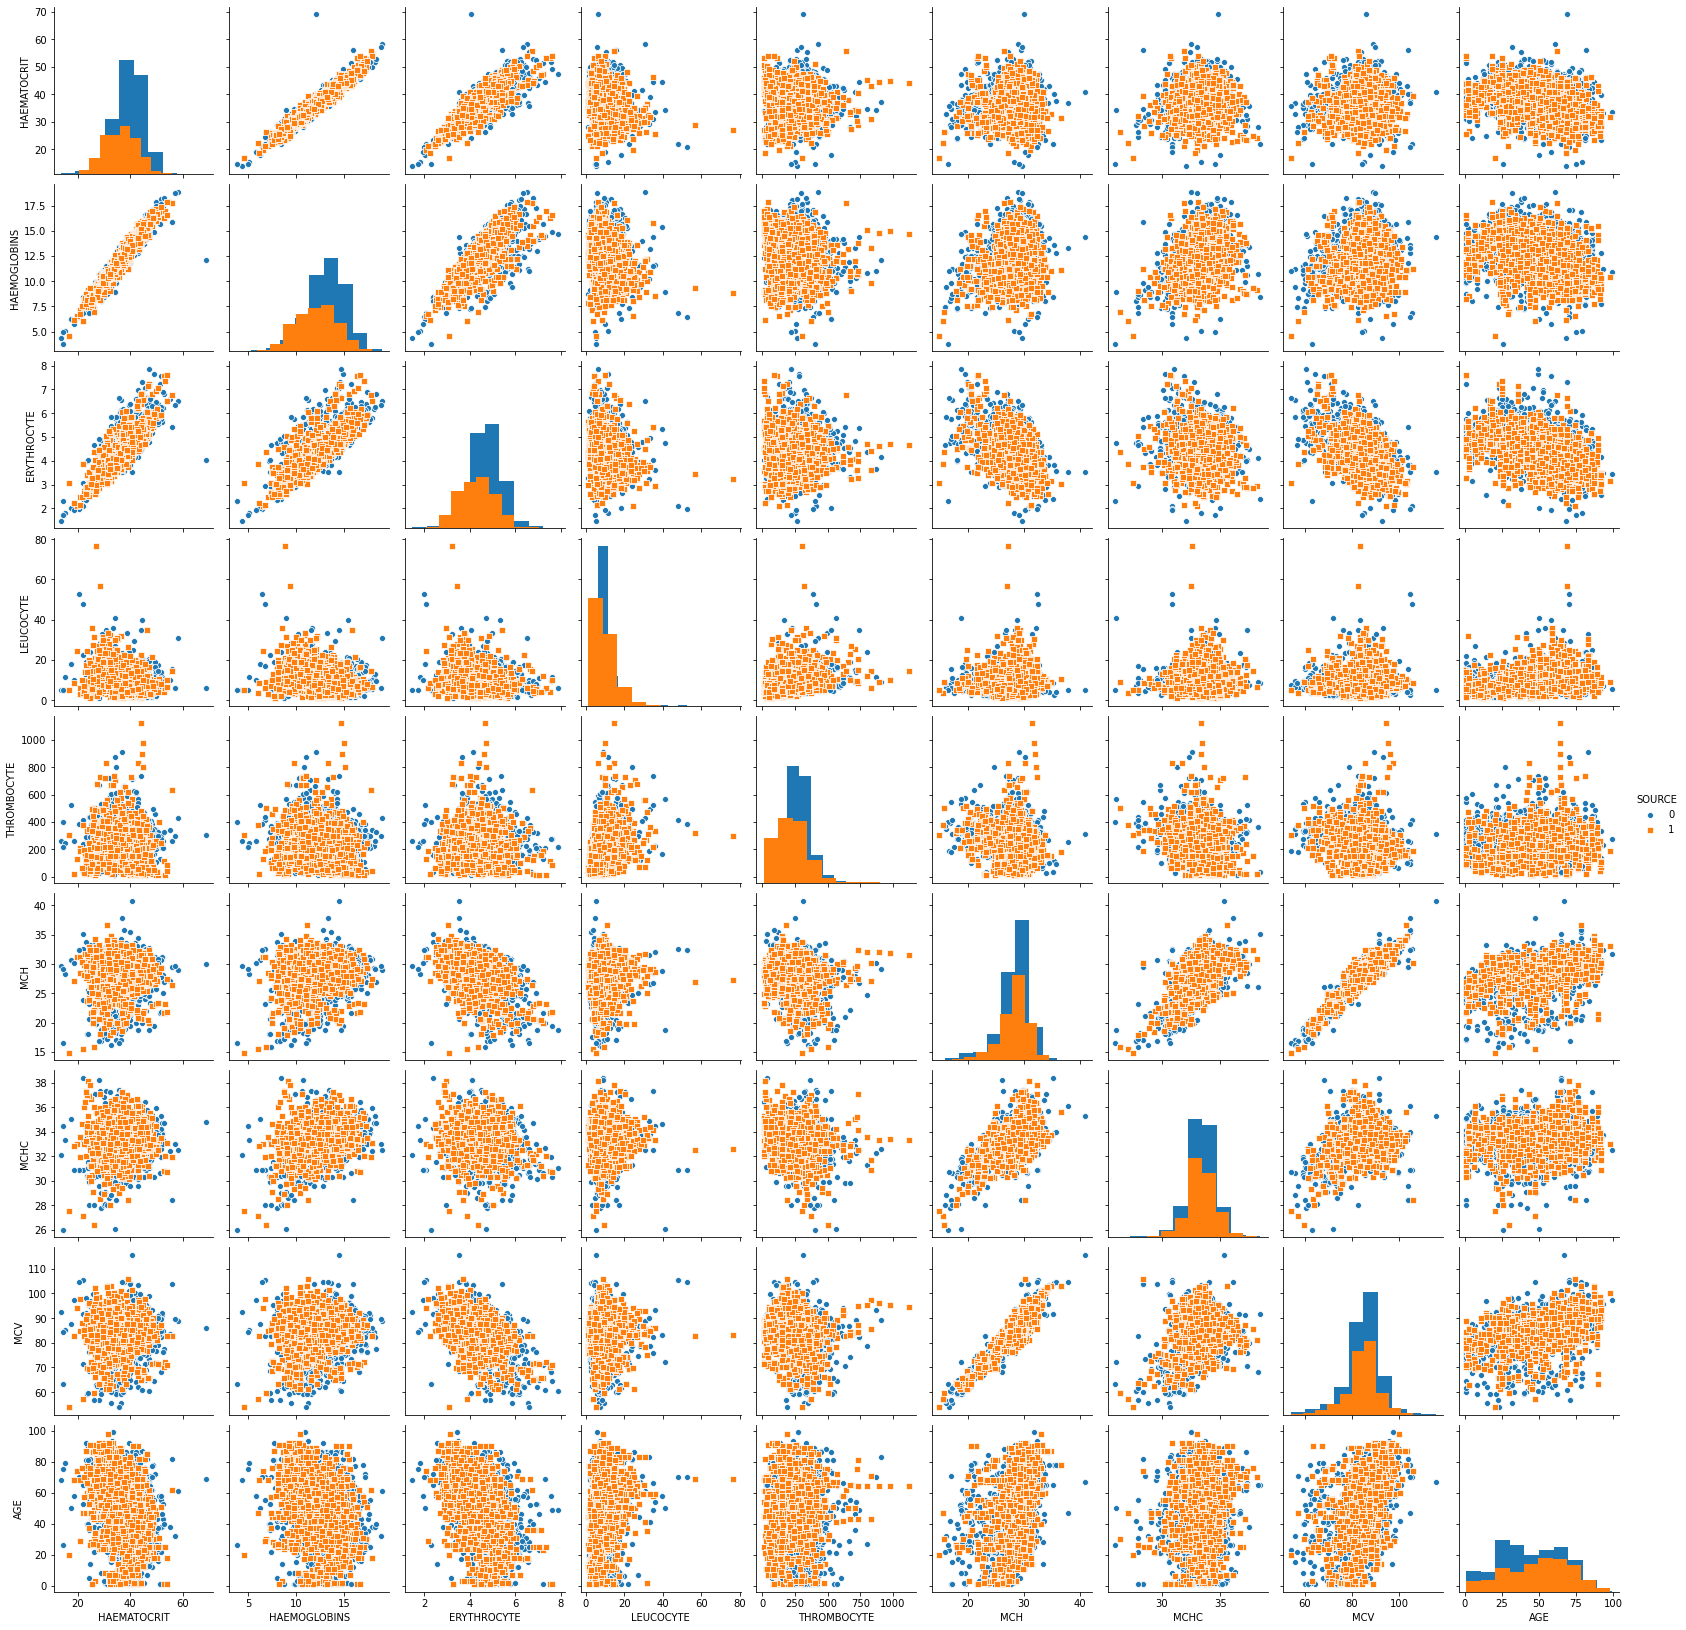

In [10]:
sns.pairplot(train,  hue="SOURCE", diag_kind="hist", markers=["o", "s"])

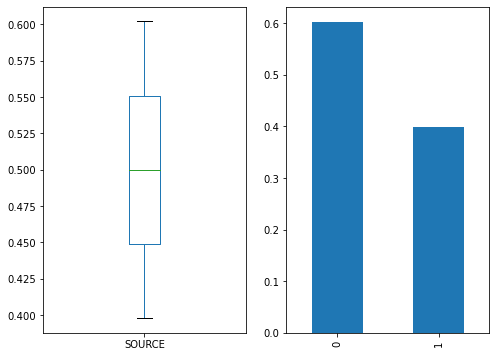

In [11]:
# Visualiza Target Variable
plt.subplot(1, 2, 1)
train.SOURCE.value_counts(normalize = True).plot.box(figsize = (8,6))
plt.subplot(1, 2, 2)
train.SOURCE.value_counts(normalize = True).plot.bar()


    1. Target 0(out-care patient) are around 60%.
    2. Target 1 (in-care patient) are around 40%.
    3. target variable distibution looks balanced

In [12]:
train.SOURCE.value_counts()

0    1992
1    1317
Name: SOURCE, dtype: int64

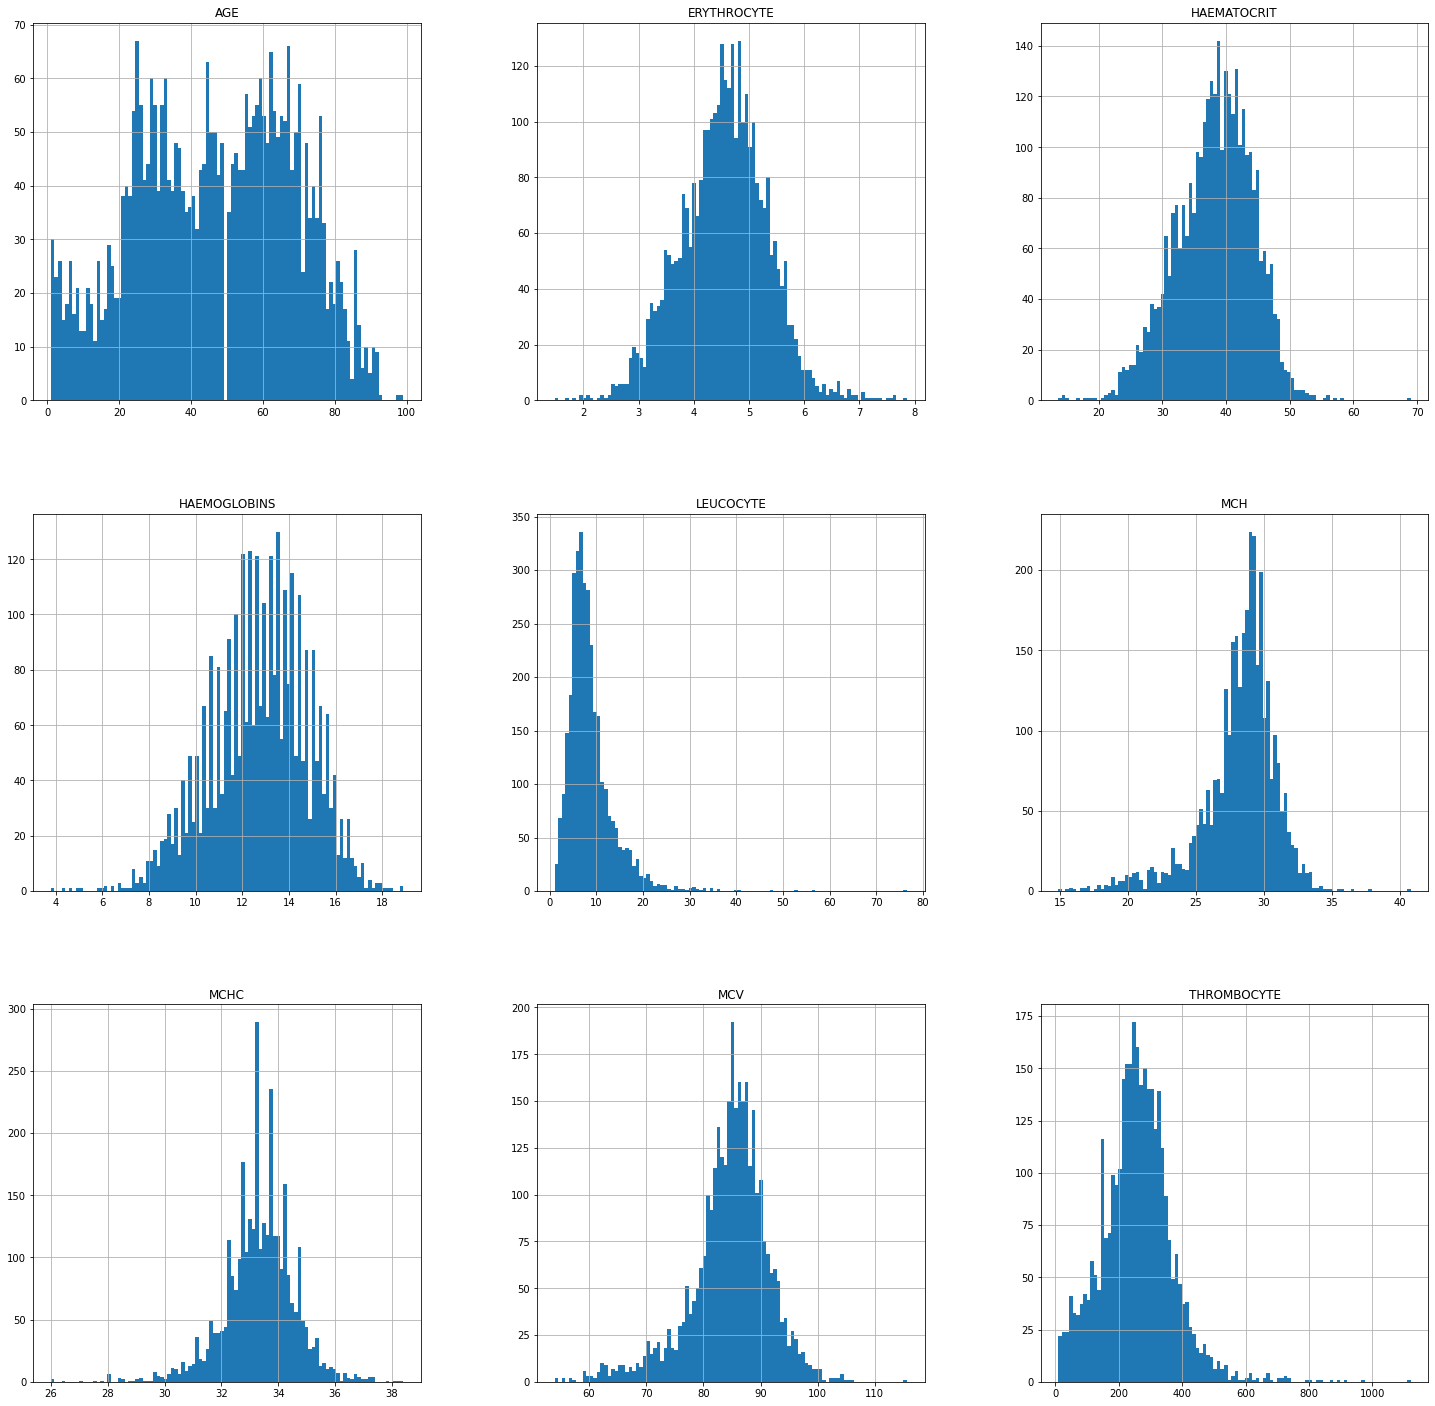

In [13]:
inde_vari_hist = train.hist(["HAEMATOCRIT", "HAEMOGLOBINS", "ERYTHROCYTE", "LEUCOCYTE", "THROMBOCYTE","MCH",
                            "MCHC", "MCV", "AGE"], bins = 100,figsize = (25,25))

    1. Haemtocrit is not uniformaly distributed.
    2. Haemoglobins - not uniformly distributed & has gap in it.
    3. Erythrocyte - not uniformly distributed but has some outliers.
    4. Leucocyte - positively skewed data & has outliers too.
    5. Thrombocyte - positively skewed data & has outlier too.
    6. MCH - negatively skewed data & has some outliers too.
    7. MCHC - it is noticed their are some outliers and uniformly distributed.
    8. MCV - looks little negatively skewed data.
    9. Age - not distrubuted evenly.
    
    all features has outliers.

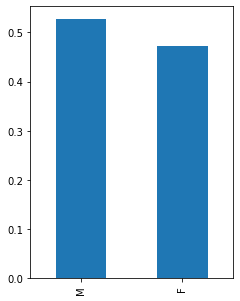

In [14]:
# Categorical variable Visualization
plt.subplot(1,2,1)
train.SEX.value_counts(normalize = True).plot.bar(figsize = (8,5))

    Male are around 53% while Female are around 47%

#### Outlier Detection

HAEMATOCRIT        AxesSubplot(0.125,0.536818;0.133621x0.343182)
HAEMOGLOBINS    AxesSubplot(0.285345,0.536818;0.133621x0.343182)
ERYTHROCYTE      AxesSubplot(0.44569,0.536818;0.133621x0.343182)
LEUCOCYTE       AxesSubplot(0.606034,0.536818;0.133621x0.343182)
THROMBOCYTE     AxesSubplot(0.766379,0.536818;0.133621x0.343182)
MCH                   AxesSubplot(0.125,0.125;0.133621x0.343182)
MCHC               AxesSubplot(0.285345,0.125;0.133621x0.343182)
MCV                 AxesSubplot(0.44569,0.125;0.133621x0.343182)
AGE                AxesSubplot(0.606034,0.125;0.133621x0.343182)
dtype: object

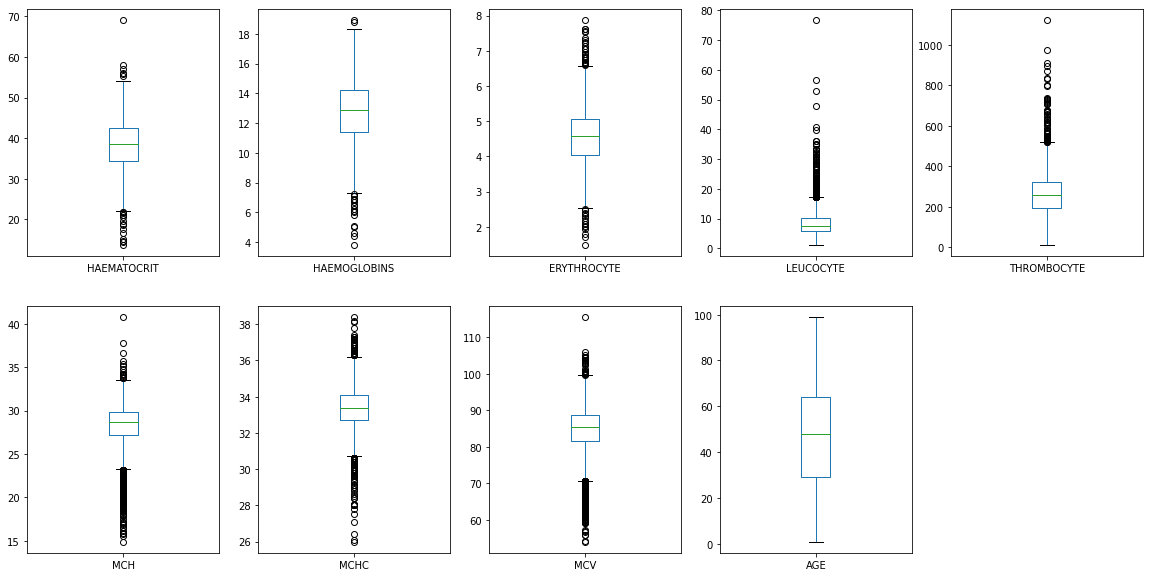

In [15]:
train.iloc[:,:-2].plot(kind='box',figsize=(20,10), subplots=True,grid=False, layout=(2, 5))

#### Correlation

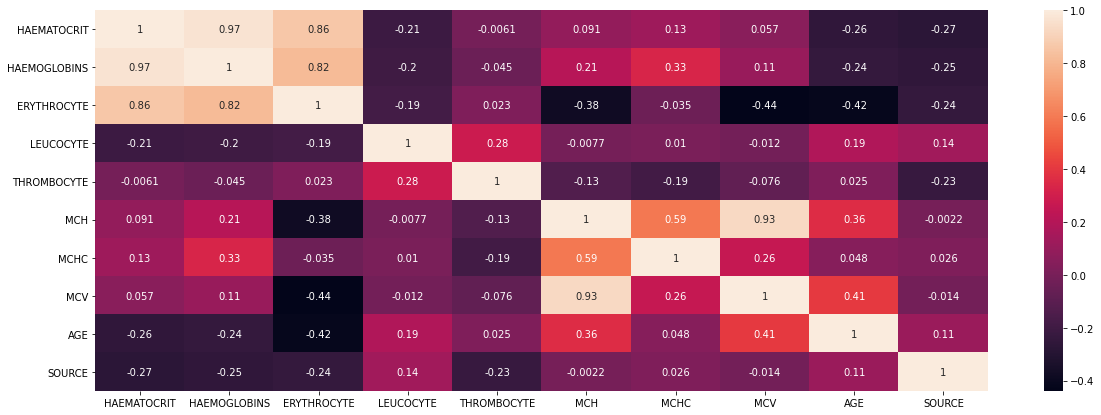

In [16]:
plt.figure(figsize=(20,7))
sns.heatmap(train.corr(), annot=True)

    1. Haematocrit correlation with Haemoglobins is 0.97 & Erythrocyte is 0.86
    2. Haemoglobins correlation with Erythrocyte is 0.82
    3. MCH correlated with MCV is 0.93 which is highest in correlation.
    4. MCH having correlation with MCHC is 0.59
    5. MCV & Age is having correlation at 0.41

### Data Preprocessind & Splitting

In [60]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Encode labels in column 'SEX'. 
train['SEX']= le.fit_transform(train['SEX'])


In [61]:
train.SEX.value_counts()

1    1743
0    1566
Name: SEX, dtype: int64

##### Scaling Train & Test data

In [19]:
# Separating Target Variable from data

X = train.iloc[:, :-1]
y = train.iloc[:, -1]

X.shape, y.shape

((3309, 10), (3309,))

In [20]:
# splitting train into train test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

#print("X_train Shape, X_test Shape")
print("X_train - ", X_train.shape)
print("X_test - ", X_test.shape)
print("y_train -",y_train.shape) 
print("y_test - ",y_test.shape)

X_train -  (2647, 10)
X_test -  (662, 10)
y_train - (2647,)
y_test -  (662,)


#### Feature Selection

In [21]:
# Feature Selection

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Define Feature Selection

def feature_selection(X_train, X_test, y_train):
    fs = SelectKBest(score_func = f_classif, k = "all")
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs


Feature_mutual_info 0 : 199.225969
Feature_mutual_info 1 : 168.053972
Feature_mutual_info 2 : 160.195156
Feature_mutual_info 3 : 48.921700
Feature_mutual_info 4 : 148.982904
Feature_mutual_info 5 : 0.690913
Feature_mutual_info 6 : 4.715674
Feature_mutual_info 7 : 0.007479
Feature_mutual_info 8 : 33.606448
Feature_mutual_info 9 : 9.709211


<BarContainer object of 10 artists>

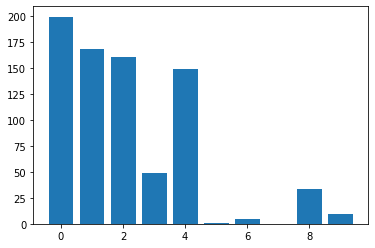

In [24]:
# Feature selection

X_train_scaled_fs, X_test_scaled_fs, y_train_fs = feature_selection(X_train_scaled, X_test_scaled, y_train)


# Scores for features
for i in range(len(y_train_fs.scores_)):
    print("Feature_mutual_info %d : %f" % (i, y_train_fs.scores_[i]))
    
# Plotting Mutual Information Feature Selection Scores
plt.bar([i for i in range(len(y_train_fs.scores_))], y_train_fs.scores_)

    Feature 0, 1, 2, and 4 are Top features we have

### Scaling the Data

###### by Standard Sclaer

In [23]:
# Scaling train data
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_train_scaled=std_scaler.fit_transform(X_train.copy())
X_test_scaled=std_scaler.fit_transform(X_test.copy())

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

# Model Building

### 1. Logistic Regression

1. Accuracy for Logistic Regression - 73.11 

2. The F1_Score for Logistic Regression is : 57.62 

3. Confusion Matrix as -  
 [[363  56]
 [122 121]] 

4. The Classification Report (Logistic Regression) as -  
               precision    recall  f1-score   support

           0       0.75      0.87      0.80       419
           1       0.68      0.50      0.58       243

    accuracy                           0.73       662
   macro avg       0.72      0.68      0.69       662
weighted avg       0.72      0.73      0.72       662



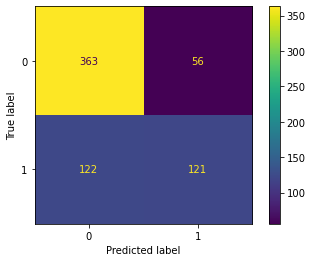

In [35]:
log_reg = LogisticRegression(random_state = 151)
log_reg.fit(X_train_scaled, y_train)

# Prediction on Train & Test data
train_log_pred = log_reg.predict(X_train_scaled)
test_log_pred = log_reg.predict(X_test_scaled)

# Accuracy
test_accuracy = (accuracy_score(y_test, test_log_pred))*100 # calculating accuracy score
print("1. Accuracy for Logistic Regression - %.2f" % test_accuracy, "\n")

# F1-Score
print("2. The F1_Score for Logistic Regression is : %.2f" % (f1_score(y_test, test_log_pred) * 100), "\n")

# Confusion Matrix
cm = confusion_matrix(y_test, test_log_pred)
print("3. Confusion Matrix as - ", "\n",cm, "\n")

# Classification Report
print("4. The Classification Report (Logistic Regression) as - ", "\n", classification_report(y_test,test_log_pred))

from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(cm).plot()



In [26]:
train_accuracy = (accuracy_score(y_train, train_log_pred))*100 # calculating accuracy score
print("Train Data Accuracy -  %.2f" % train_accuracy)

Train Data Accuracy -  71.89


##### Logistic Regresstion by using Feature Selection

#### Random Forest Classifier

1. Test Data Accuracy (Random Forest Classification) - 77.34 

2. The F1_Score for Random Forest Classifier is : 67.25 

3. Confusion Matrix as -  
 [[358  61]
 [ 89 154]] 

4. The Classification Report (Logistic Regression) as -  
               precision    recall  f1-score   support

           0       0.80      0.85      0.83       419
           1       0.72      0.63      0.67       243

    accuracy                           0.77       662
   macro avg       0.76      0.74      0.75       662
weighted avg       0.77      0.77      0.77       662



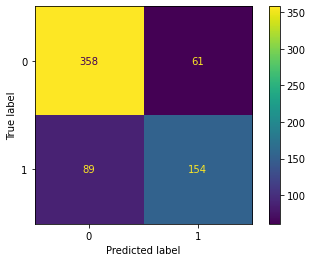

In [58]:
rf_classifier = RandomForestClassifier(random_state = 43)
rf_classifier.fit(X_train, y_train)

# Predictions
train_rf_pred = rf_classifier.predict(X_train)
test_rf_pred = rf_classifier.predict(X_test)

# Accuracy
test_accuracy = (accuracy_score(y_test, test_rf_pred))*100 # calculating accuracy score
print("1. Test Data Accuracy (Random Forest Classification) - %.2f" % test_accuracy, "\n")

# F1-Score
print("2. The F1_Score for Random Forest Classifier is : %.2f" % (f1_score(y_test, test_rf_pred) * 100), "\n")

# Confusion Matrix
cm = confusion_matrix(y_test, test_rf_pred)
print("3. Confusion Matrix as - ", "\n",cm, "\n")

# Classification Report
print("4. The Classification Report (Logistic Regression) as - ", "\n", classification_report(y_test, test_rf_pred))

# Comfusion Matrix Heatmap
cm_display = ConfusionMatrixDisplay(cm).plot()

#### Support Vector Machine

1. Accuracy Score (Support Vector Classification) - 77.04 

2. The F1_Score for SVM Classifier is : 65.45 

3. Confusion Matrix as -  
 [[366  53]
 [ 99 144]] 

4. The Classification Report (SVM) as -  
               precision    recall  f1-score   support

           0       0.79      0.87      0.83       419
           1       0.73      0.59      0.65       243

    accuracy                           0.77       662
   macro avg       0.76      0.73      0.74       662
weighted avg       0.77      0.77      0.76       662



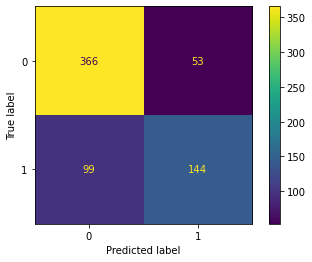

In [37]:
#Training SVM Model on Train Set
from sklearn.svm import SVC
svm_classifier = SVC(kernel = 'rbf', random_state = 43)
svm_classifier.fit(X_train_scaled_fs, y_train)

# Predicting on Test set
svm_pred = svm_classifier.predict(X_test_scaled_fs)

# Accuracy
test_accuracy = (accuracy_score(y_test, svm_pred))*100 # calculating accuracy score
print("1. Accuracy Score (Support Vector Classification) - %.2f" % test_accuracy, "\n")

# F1-Score
print("2. The F1_Score for SVM Classifier is : %.2f" % (f1_score(y_test, svm_pred) * 100), "\n")


# Confusion Matrix
cm = confusion_matrix(y_test, svm_pred)
print("3. Confusion Matrix as - ", "\n",cm, "\n")

# Classification Report
print("4. The Classification Report (SVM) as - ", "\n", classification_report(y_test,svm_pred))

# Comfusion Matrix Heatmap
cm_display = ConfusionMatrixDisplay(cm).plot()

##### k-NN (k_Nearest_Neighbors)

1. Accuracy Score (k-NN Classification) - 76.28 

2. The F1_Score for k_Nearest Neighbors Classifier is : 66.52 

3. Confusion Matrix as -  
 [[349  70]
 [ 87 156]] 

4. The Classification Report (k-NN) as -  
               precision    recall  f1-score   support

           0       0.80      0.83      0.82       419
           1       0.69      0.64      0.67       243

    accuracy                           0.76       662
   macro avg       0.75      0.74      0.74       662
weighted avg       0.76      0.76      0.76       662



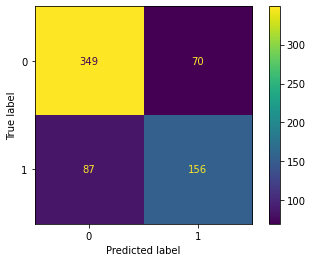

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train_scaled_fs, y_train)

# Prediction
knn_pred = knn_classifier.predict(X_test_scaled_fs)

# Accuracy
test_accuracy = (accuracy_score(y_test, knn_pred))*100 # calculating accuracy score
print("1. Accuracy Score (k-NN Classification) - %.2f" % test_accuracy, "\n")

# F1-Score
print("2. The F1_Score for k_Nearest Neighbors Classifier is : %.2f" % (f1_score(y_test, knn_pred) * 100), "\n")

# Confusion Matrix
cm = confusion_matrix(y_test, knn_pred)
print("3. Confusion Matrix as - ", "\n",cm, "\n")

# Classification Report
print("4. The Classification Report (k-NN) as - ", "\n", classification_report(y_test, knn_pred))

# Comfusion Matrix Heatmap
cm_display = ConfusionMatrixDisplay(cm).plot()

##### Quantile Transformer Scaler

In [40]:
# Scaling train data
from sklearn.preprocessing import QuantileTransformer
qt_scaler = QuantileTransformer(output_distribution = 'normal')
X_train_qt=qt_scaler.fit_transform(X_train.copy())
X_test_qt=qt_scaler.fit_transform(X_test.copy())

# Feature Selection
# X_train_qt_fs, X_test_qt_fs, fs = feature_selection(X_train_qt, X_test_qt, y_train)

#### Logistic regression under Quantile Transformer Scale

In [80]:

log_reg.fit(X_train_qt, y_train)

# Prediction on Train & Test data
# train_log_pred = log_reg.predict(X_train_qt)
test_log_pred = log_reg.predict(X_test_qt)

# Accuracy
test_accuracy = (accuracy_score(y_test, test_log_pred))*100 # calculating accuracy score
print("1. Test Data Accuracy - %.2f" % test_accuracy, "\n")

# F1-Score
print("2. The F1_Score for Logistic Regression Classifier is : %.2f" % (f1_score(y_test, svm_pred) * 100), "\n")

# Confusion Matrix
cm = confusion_matrix(y_test, test_log_pred)
print("3. Confusion Matrix as - ", "\n",cm, "\n")

# Classification Report
print("4. The Classification Report (Logistic Regression) as - ", "\n", classification_report(y_test,test_log_pred))
# cm_display = ConfusionMatrixDisplay(cm).plot()


1. Test Data Accuracy - 73.41 

2. The F1_Score for Logistic Regression Classifier is : 64.65 

3. Confusion Matrix as -  
 [[360  59]
 [117 126]] 

4. The Classification Report (Logistic Regression) as -  
               precision    recall  f1-score   support

           0       0.75      0.86      0.80       419
           1       0.68      0.52      0.59       243

    accuracy                           0.73       662
   macro avg       0.72      0.69      0.70       662
weighted avg       0.73      0.73      0.72       662



1. Accuracy (Support Vector Classification) - 77.04 

2. The F1_Score for SVM Classifier is : 64.65 

3. Confusion Matrix as -  
 [[371  48]
 [104 139]] 

4. The Classification Report (SVM) as -  
               precision    recall  f1-score   support

           0       0.78      0.89      0.83       419
           1       0.74      0.57      0.65       243

    accuracy                           0.77       662
   macro avg       0.76      0.73      0.74       662
weighted avg       0.77      0.77      0.76       662



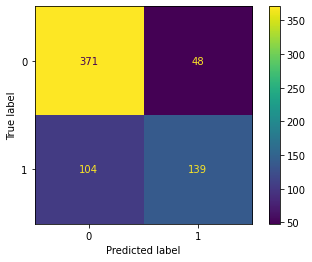

In [81]:
# SVM under Quantile Transformer Scale

svm_classifier_2 = SVC(kernel = 'rbf', gamma = 'auto', random_state = 43)
svm_classifier_2.fit(X_train_qt, y_train)

# Predicting on Test set
svm_pred = svm_classifier_2.predict(X_test_qt)

# Accuracy
test_accuracy = (accuracy_score(y_test, svm_pred))*100 # calculating accuracy score
print("1. Accuracy (Support Vector Classification) - %.2f" % test_accuracy, "\n")

# F1-Score
print("2. The F1_Score for SVM Classifier is : %.2f" % (f1_score(y_test, svm_pred) * 100), "\n")

# Confusion Matrix
cm = confusion_matrix(y_test, svm_pred)
print("3. Confusion Matrix as - ", "\n",cm, "\n")

# Classification Report
print("4. The Classification Report (SVM) as - ", "\n", classification_report(y_test,svm_pred))

# Comfusion Matrix Heatmap
cm_display = ConfusionMatrixDisplay(cm).plot()

1. Accuracy Score (k-NN Classification) - 73.87 

2. The F1_Score for k-NN Classifier is : 63.11 

3. Confusion Matrix as -  
 [[341  78]
 [ 95 148]] 

4. The Classification Report (k-NN) as -  
               precision    recall  f1-score   support

           0       0.78      0.81      0.80       419
           1       0.65      0.61      0.63       243

    accuracy                           0.74       662
   macro avg       0.72      0.71      0.71       662
weighted avg       0.74      0.74      0.74       662



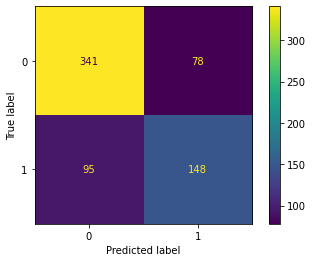

In [82]:
# K-NN under Quantile Transformer Scale

knn_classifier_2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier_2.fit(X_train_qt, y_train)

# Prediction
knn_pred = knn_classifier_2.predict(X_test_qt)

# Accuracy
test_accuracy = (accuracy_score(y_test, knn_pred))*100 # calculating accuracy score
print("1. Accuracy Score (k-NN Classification) - %.2f" % test_accuracy, "\n")

# F1-Score
print("2. The F1_Score for k-NN Classifier is : %.2f" % (f1_score(y_test, knn_pred) * 100), "\n")

# Confusion Matrix
cm = confusion_matrix(y_test, knn_pred)
print("3. Confusion Matrix as - ", "\n",cm, "\n")

# Classification Report
print("4. The Classification Report (k-NN) as - ", "\n", classification_report(y_test, knn_pred))

# Comfusion Matrix Heatmap
cm_display = ConfusionMatrixDisplay(cm).plot()

### Grid Search CV

###### GridSearchCV applied on SVM

In [77]:
# defining parameter range 
svm = SVC(kernel = 'rbf', gamma = 'auto', random_state = 43)
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [0.01, 0.10,0.15 ,0.20],
    'kernel': ['rbf']
}  

grid_svm = GridSearchCV(svm, param_grid, refit = True, verbose = 4) 
# X_train_new, X_test_new = X_train.copy(), X_test.copy()

# fitting the model for grid search 
grid_svm.fit(X_train_scaled, y_train) 
print(grid_svm.best_estimator_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.706, total=   0.2s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.674, total=   0.2s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.686, total=   0.2s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s


[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.677, total=   0.2s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.675, total=   0.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.774, total=   0.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.725, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.735, total=   0.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.724, total=   0.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.745, total=   0.2s
[CV] C=0.1, gamma=0.15, kernel=rbf ...................................
[CV] .

[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.745, total=   0.3s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.728, total=   0.3s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.730, total=   0.3s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.760, total=   0.3s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.736, total=   0.7s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.723, total=   0.6s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.732, total=   0.7s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.2min finished


SVC(C=1, gamma=0.15, random_state=43)


In [78]:
grid_svm.best_score_

0.7567050683026001

In [79]:
# Grid Prediction for SVM
grid_svm_pred = grid_svm.predict(X_test_scaled)

# Accuracy
grid_accuracy = (accuracy_score(y_test, grid_svm_pred))*100 # calculating accuracy score
print("1. Accuracy Score (under GridSearchCV) - %.2f" % grid_accuracy, "\n")

# F1-Score
print("2. The F1_Score for GridSearchCV_SVM Classifier is : %.2f" % (f1_score(y_test, grid_svm_pred) * 100), "\n")

# Classification Report
print("3. The Classification Report (under GridSearchCV) as - ", "\n", 
      classification_report(y_test, grid_svm_pred))

1. Accuracy Score (under GridSearchCV) - 77.34 

2. The F1_Score for GridSearchCV_SVM Classifier is : 65.28 

3. The Classification Report (under GridSearchCV) as -  
               precision    recall  f1-score   support

           0       0.78      0.89      0.83       419
           1       0.75      0.58      0.65       243

    accuracy                           0.77       662
   macro avg       0.77      0.73      0.74       662
weighted avg       0.77      0.77      0.77       662



##### Grid Search applied on Random Forest

In [48]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [5, 10, 15],
    'n_estimators': [100, 500, 1000]}

rf = RandomForestClassifier(random_state = 43)

# Grid search cv
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 4, n_jobs = -1, verbose = 4)

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 18 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  1.3min finished


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=43), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [5, 10, 15],
                         'n_estimators': [100, 500, 1000]},
             verbose=4)

In [49]:
grid_search.best_params_

{'bootstrap': True, 'max_depth': 15, 'n_estimators': 500}

In [51]:
grid_search_pred = grid_search.predict(X_test)

# Accuracy
test_accuracy = (accuracy_score(y_test, grid_search_pred))*100 # calculating accuracy score
print("Test Data Accuracy (under GridSearchCV) - %.2f" % test_accuracy, "\n")

# F1-Score
print("2. The F1_Score for GridSearchCV_Random Forest Classifier is : %.2f" % \
      (f1_score(y_test, grid_search_pred) * 100), "\n")

# Classification Report
print("The Classification Report (under GridSearchCV) as - ", "\n", 
      classification_report(y_test, grid_search.predict(X_test)))

Test Data Accuracy (under GridSearchCV) - 76.74 

2. The F1_Score for GridSearchCV_Random Forest Classifier is : 66.67 

The Classification Report (under GridSearchCV) as -  
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       419
           1       0.70      0.63      0.67       243

    accuracy                           0.77       662
   macro avg       0.75      0.74      0.74       662
weighted avg       0.76      0.77      0.76       662



### Boruta Random Forest Feature Select

In [52]:
# Applying Boruta Random Feature Selection -

from boruta import BorutaPy

rfc = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5)
boruta_selector = BorutaPy(rfc, n_estimators='auto', verbose=2, random_state=1)   # initialize the boruta selector
boruta_selector.fit(np.array(X_train), np.array(y_train))

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	7
Tentative: 	2
Rejected: 	1
Iteration: 	9 / 100
Confirmed: 	7
Tentative: 	2
Rejected: 	1
Iteration: 	10 / 100
Confirmed: 	7
Tentative: 	2
Rejected: 	1
Iteration: 	11 / 100
Confirmed: 	7
Tentative: 	2
Rejected: 	1
Iteration: 	12 / 100
Confirmed: 	8
Tentative: 	1
Rejected: 	1
Iteration: 	13 / 100
Confirmed: 	8
Tentative: 	1
Rejected: 	1
Iteration: 	14 / 100
Confirmed: 	8
Tentative: 	1
Rejected: 	1
Iteration: 	15 / 100
Confirmed: 	8
Tentative: 	1
Rejected: 	1
Iteration: 	16 / 100
Confirmed: 	8
Tentative: 	1
Rejected: 	1
Iteration:

BorutaPy(estimator=RandomForestClassifier(max_depth=5, n_estimators=84,
                                          random_state=RandomState(MT19937) at 0x1732EA3B40),
         n_estimators='auto', random_state=RandomState(MT19937) at 0x1732EA3B40,
         verbose=2)

##### Check Feature Selected & their Ranings

In [53]:
print("Selected Features: ", boruta_selector.support_)    # check selected features
 

print("Ranking: ",boruta_selector.ranking_)               # check ranking of features

print("No. of significant features: ", boruta_selector.n_features_)

Selected Features:  [ True  True  True  True  True  True  True  True  True False]
Ranking:  [1 1 1 1 1 1 1 1 1 2]
No. of significant features:  9


##### Display Feature Selected

In [54]:
selected_rf_features = pd.DataFrame({'Feature':list(X_train.columns),
                                      'Ranking':boruta_selector.ranking_})
selected_rf_features.sort_values(by='Ranking')

,Feature,Ranking
0,HAEMATOCRIT,1
1,HAEMOGLOBINS,1
2,ERYTHROCYTE,1
3,LEUCOCYTE,1
4,THROMBOCYTE,1
5,MCH,1
6,MCHC,1
7,MCV,1
8,AGE,1
9,SEX,2


##### Creat New set of data with feature selected

In [55]:
X_train_boruta = boruta_selector.transform(np.array(X_train))
X_test_boruta = boruta_selector.transform(np.array(X_test))

###### Built a Model with Feature Selected

In [56]:
# Create a new random forest classifier for the most important features
rf_boruta = RandomForestClassifier(random_state=43)

# Train the new classifier on the new dataset containing the most important features
rf_boruta.fit(X_train_boruta, y_train)

# Predict model Under Boruta
boruta_rf_pred = rf_boruta.predict(X_test_boruta)
# Accuracy
accuracy = (accuracy_score(y_test, boruta_rf_pred))*100 # calculating accuracy score
print("1. Accuracy Score (Random Forest under Boruta) - %.2f" % accuracy, "\n")

# F1-Score
print("2. The F1_Score for Boruta_random_forest is : %.2f" % (f1_score(y_test, boruta_rf_pred) * 100), "\n")

# Classification Report
print("3. The Classification Report (Random Forest under Boruta) as - ", "\n", 
      classification_report(y_test, boruta_rf_pred))

1. Accuracy Score (Random Forest under Boruta) - 75.98 

2. The F1_Score for Boruta_random_forest is : 65.66 

3. The Classification Report (Random Forest under Boruta) as -  
               precision    recall  f1-score   support

           0       0.79      0.84      0.82       419
           1       0.69      0.63      0.66       243

    accuracy                           0.76       662
   macro avg       0.74      0.73      0.74       662
weighted avg       0.76      0.76      0.76       662



# Test Data

In [64]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Encode labels in column 'SEX'. 
test['SEX']= le.fit_transform(test['SEX'])
test.SEX

0       1
1       1
2       0
3       1
4       1
       ..
1098    1
1099    0
1100    0
1101    0
1102    0
Name: SEX, Length: 1103, dtype: int32

In [63]:
test.info

<bound method DataFrame.info of       HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE   MCH  \
0            41.2          14.3         3.99        4.1          296  35.8   
1            25.4           9.1         3.17       19.3          304  28.7   
2            47.5          15.2         6.23       11.5          385  24.4   
3            43.0          14.5         5.35        4.8          134  27.1   
4            40.7          13.6         4.77        4.3          199  28.5   
...           ...           ...          ...        ...          ...   ...   
1098         32.0          10.2         3.60       12.9          270  28.3   
1099         42.0          13.5         5.00        5.0          297  27.0   
1100         39.3          13.3         4.49        3.3           50  29.6   
1101         38.9          12.9         4.32        3.2          154  29.9   
1102         39.2          13.2         5.05        3.9           42  26.1   

      MCHC    MCV  AGE SEX  
0 

In [65]:
# Random Forest Prediction on test_data
test_pred = rf_classifier.predict(test)
test_pred


#test_data_rf_pred = np.round_(rf_classifier(test_data), decimals = 2)
#test_data_rf_pred

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [66]:
res = pd.DataFrame(test_pred) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = test_data.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]
res.to_csv("Random_predictions.csv", index = False) 

388

In [95]:
models = {'Logistic Regression': log_reg, 'Random Forest Classifier': rf_classifier, 'SVM Classifier': svm_classifier,
          'k-NN Classifier': knn_classifier, 'Logistic Reg with QT_Scaler' : log_reg, 'SVM with QT_Scaler':svm_classifier_2,
          'k-NN with QT_Scaler' : knn_classifier_2, 'GridSearchCV_SVM' : grid_svm, 'GridSearchCV_RForest' : grid_search,
          'Random Forest with Boruta Selector': rf_boruta}

test_data = [X_test_scaled, X_test, X_test_scaled, X_test_scaled, X_test_qt, X_test_qt, X_test_qt, X_test_scaled,X_test,
             X_test_boruta]
model_performance = []
exp = 1
for key, value in models.items():
  model_performance.append([exp, key, round(f1_score(y_test, value.predict(test_data[exp-1]))*100, 2)])
  exp += 1

In [99]:
models = pd.DataFrame(model_performance, columns=['Model_no.:','Models', 'F1_Score'])
models

,Model_no.:,Models,F1_Score
0,1,Logistic Regression,58.20
1,2,Random Forest Classifier,67.25
2,3,SVM Classifier,31.76
3,4,k-NN Classifier,62.86
4,5,Logistic Reg with QT_Scaler,58.88
5,6,SVM with QT_Scaler,64.65
6,7,k-NN with QT_Scaler,63.11
7,8,GridSearchCV_SVM,65.28
8,9,GridSearchCV_RForest,66.67
9,10,Random Forest with Boruta Selector,65.66


# Conclusion -

    Random Forest Classification is best with 67.25 F1_score as compared to other Models.